In [4]:
!pip install python-ternary
from scipy.stats import dirichlet, multinomial
import numpy as np
import matplotlib.pyplot as plt
import ternary

  Using cached python_ternary-1.0.8-py3-none-any.whl.metadata (1.0 kB)
Using cached python_ternary-1.0.8-py3-none-any.whl (18 kB)


In [43]:
# For Multinomial Part:
n = 10
theta = [0.3, 0.3, 0.4]
np.random.seed(2001)
mul_spl = multinomial.rvs(n, theta, size=10)[2]
print (mul_spl)

[3 3 4]


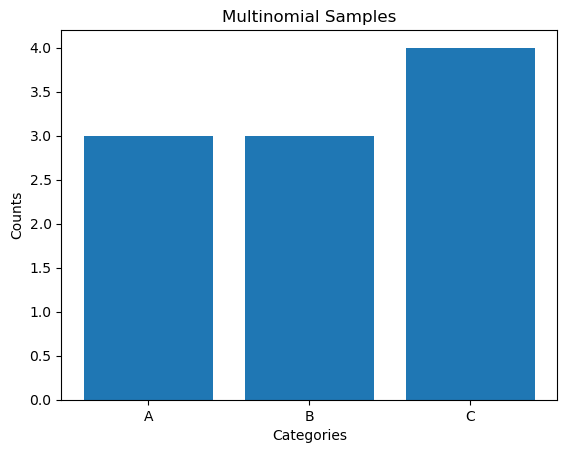

In [44]:
# Visualize the Multinomial Sample:
cty = ["A", "B", "C"]
plt.bar(cty, mul_spl)
plt.title("Multinomial Samples")
plt.ylabel("Counts")
plt.xlabel("Categories")
plt.show()

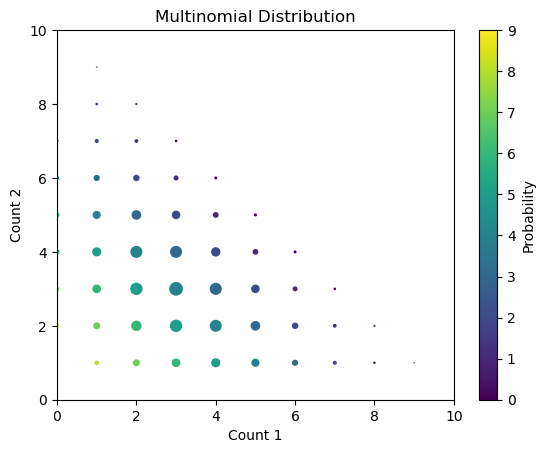

In [45]:
# Visualize the Multinomial Distribution:
P = []
for x1 in range(n + 1):
    for x2 in range(1, n - x1 + 1):
        x3 = n - x1 - x2
        if x3 >= 0:
            mul_pmf = multinomial.pmf([x1, x2, x3], n, theta)
            P.append((x1, x2, x3, mul_pmf))
data = np.array(P)
plt.scatter(data[:, 0], data[:, 1], c=data[:, 2], s=data[:, 3] * 1000)
plt.title("Multinomial Distribution")
plt.colorbar(label="Probability")
plt.xlim(0, n)
plt.ylim(0, n)
plt.xlabel("Count 1")
plt.ylabel("Count 2")
plt.show()

In [72]:
# For Dirichlet Prior:
alpha_prior = [1, 1, 1] 
alpha_prior_samples = np.random.dirichlet(alpha_prior, size=3000)

alpha_posterior = alpha_prior + mul_spl
posterior_samples = np.random.dirichlet(alpha_posterior, size=3000)

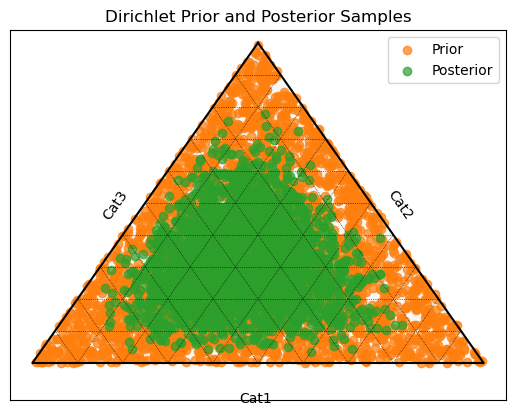

In [73]:
prior_pts = [tuple(p) for p in alpha_prior_samples]
posterior_pts = [tuple(p) for p in posterior_samples]
fig, tax = ternary.figure(scale=1.0)
tax.scatter(prior_pts, cmap='viridis', alpha=0.7, label = "Prior")
tax.scatter(posterior_pts, cmap='blue', alpha=0.7, label = "Posterior")
tax.boundary()
tax.gridlines(color = "black", multiple = 0.1)
tax.set_title("Dirichlet Prior and Posterior Samples")
tax.left_axis_label("Cat3", fontsize = 10)
tax.right_axis_label("Cat2", fontsize = 10)
tax.bottom_axis_label("Cat1")
tax.legend()
tax.clear_matplotlib_ticks()
tax._redraw_labels()
plt.show()